In [1]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from sklearn.metrics import accuracy_score


ModuleNotFoundError: No module named 'cv2'

In [ ]:
data_dir = r'C:\Users\heman\OneDrive\Desktop\Deep Fake Detection\data\real_and_fake_face'

In [ ]:
def load_dataset(data_dir):
    images = []
    labels = []
    
    # Use the correct subfolder names for real and fake images
    subfolders = {'real': 'training_real', 'fake': 'training_fake'}
    
    for label, subfolder in subfolders.items():
        folder_path = os.path.join(data_dir, subfolder)
        print(f"Accessing folder: {folder_path}")  # Print the folder path for debugging
        for img_name in os.listdir(folder_path):
            img_path = os.path.join(folder_path, img_name)
            img = cv2.imread(img_path)
            img = cv2.resize(img, (224, 224))  # Resize images to 224x224 for CNN input
            images.append(img)
            labels.append(0 if label == 'real' else 1)
    
    return np.array(images), np.array(labels)

In [ ]:
X, y = load_dataset(data_dir)

Accessing folder: C:\Users\heman\OneDrive\Desktop\Deep Fake Detection\data\real_and_fake_face\training_real
Accessing folder: C:\Users\heman\OneDrive\Desktop\Deep Fake Detection\data\real_and_fake_face\training_fake


In [ ]:
X = X.astype('float32') / 255.0
y = to_categorical(y, 2)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(2, activation='softmax')  # Two outputs for one-hot encoding
])

# Compile the model with categorical_crossentropy for one-hot encoded labels
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model with one-hot encoded labels
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

c:\Users\heman\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 312ms/step - accuracy: 0.4686 - loss: 13.1257 - val_accuracy: 0.5556 - val_loss: 20.6769
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 240ms/step - accuracy: 0.4488 - loss: 20.0054 - val_accuracy: 0.4444 - val_loss: 27.6501
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 238ms/step - accuracy: 0.5392 - loss: 19.5774 - val_accuracy: 0.4444 - val_loss: 7.8168
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 243ms/step - accuracy: 0.5649 - loss: 4.0475 - val_accuracy: 0.5556 - val_loss: 3.5586
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 236ms/step - accuracy: 0.5984 - loss: 2.4638 - val_accuracy: 0.4444 - val_loss: 4.8639
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 235ms/step - accuracy: 0.5277 - loss: 2.6537 - val_accuracy: 0.5556 - val_loss: 2.0231
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 238ms/step - accuracy: 0.5677 - loss: 1.5090 - val_accuracy: 0.4444 - val_loss: 1.8601
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 234ms/step - accuracy: 0.6496 - loss: 0.7825 - val_accuracy: 0.6667 - val_

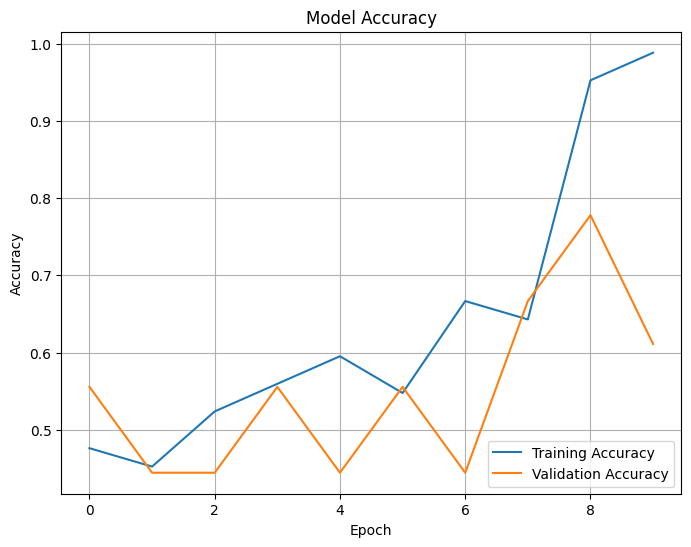

In [ ]:
def plot_accuracy(history):
    """Plot training and validation accuracy."""
    plt.figure(figsize=(8, 6))
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()

# Assuming you have already trained your model and have a history object
plot_accuracy(history)

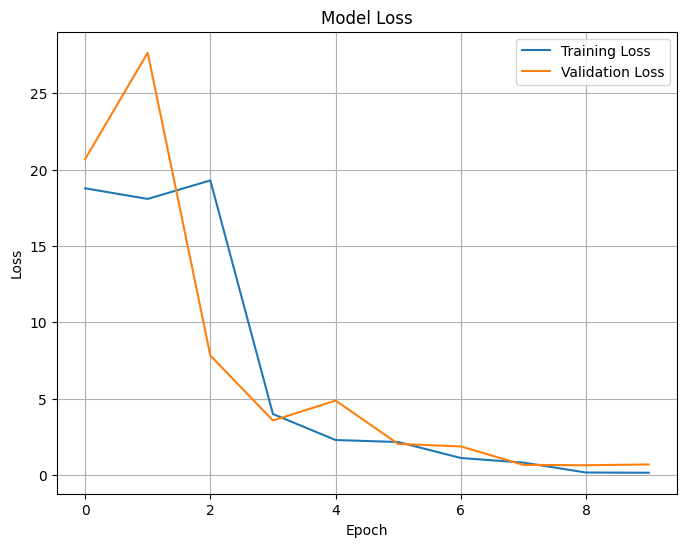

In [ ]:
def plot_loss(history):
    """Plot training and validation loss."""
    plt.figure(figsize=(8, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(loc='upper right')
    plt.grid(True)
    plt.show()

# Assuming you have already trained your model and have a history object
plot_loss(history)

In [ ]:
print(f'Training samples: {X_train.shape[0]}')
print(f'Validation samples: {X_val.shape[0]}')
print(f'Test samples: {X_test.shape[0]}')

Training samples: 84
Validation samples: 18
Test samples: 19


Training Samples:


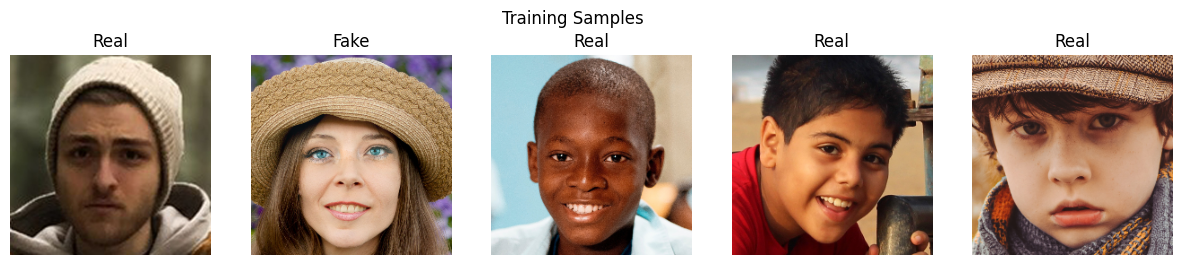

Validation Samples:


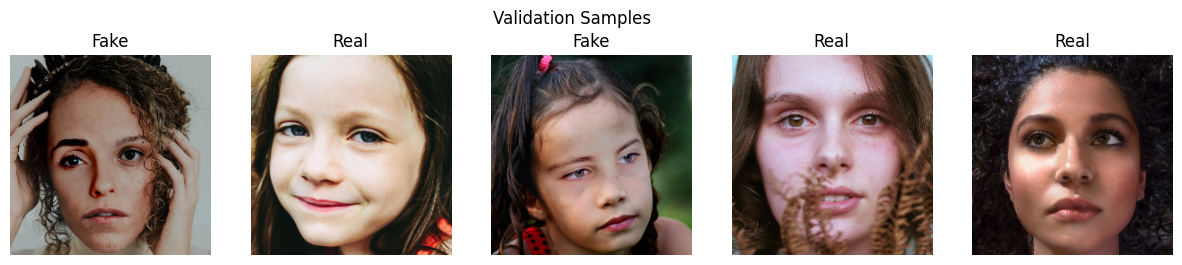

Test Samples:


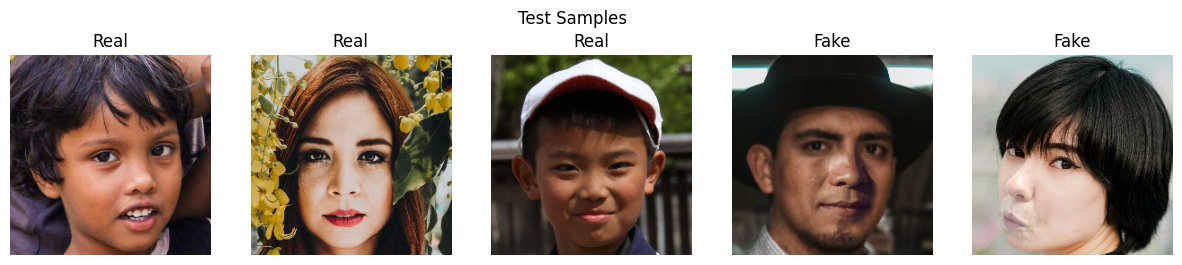

In [ ]:
def plot_sample_images(images, labels, title, n=5):
    plt.figure(figsize=(15, 3))
    plt.suptitle(title)
    for i in range(n):
        ax = plt.subplot(1, n, i + 1)

        # Convert BGR to RGB for display
        plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))

        # If labels are one-hot encoded, get the index of the max value
        if isinstance(labels[i], np.ndarray):
            label = np.argmax(labels[i])
        else:
            label = labels[i]

        plt.title('Real' if label == 0 else 'Fake')
        plt.axis("off")
    plt.show()

# Display a few training images
print("Training Samples:")
plot_sample_images(X_train, y_train, "Training Samples")

# Display a few validation images
print("Validation Samples:")
plot_sample_images(X_val, y_val, "Validation Samples")

# Display a few test images
print("Test Samples:")
plot_sample_images(X_test, y_test, "Test Samples")

In [ ]:
def count_images(real_dir, fake_dir):
    """Count the number of images in real and fake directories."""
    counts = {'real': 0, 'fake': 0}
    
    if os.path.exists(real_dir):
        counts['real'] = len(os.listdir(real_dir))
    else:
        print(f"Real directory not found: {real_dir}")
    
    if os.path.exists(fake_dir):
        counts['fake'] = len(os.listdir(fake_dir))
    else:
        print(f"Fake directory not found: {fake_dir}")
    
    return counts

# Update paths
real_dir = r'C:\Users\heman\OneDrive\Desktop\Deep Fake Detection\data\real_and_fake_face\training_real'
fake_dir = r'C:\Users\heman\OneDrive\Desktop\Deep Fake Detection\data\real_and_fake_face\training_fake'

class_counts = count_images(real_dir, fake_dir)
print(f"Number of Real Images: {class_counts['real']}")
print(f"Number of Fake Images: {class_counts['fake']}")

Number of Real Images: 60
Number of Fake Images: 61


In [ ]:
# Define loss function
loss_function = BinaryCrossentropy()

# Predict on test data
predictions = model.predict(X_test)
true_labels = np.argmax(y_test, axis=1) if y_test.ndim > 1 else y_test

# Convert predictions to binary labels
predicted_labels = np.argmax(predictions, axis=1) if predictions.shape[1] > 1 else (predictions > 0.5).astype(int)

# Calculate loss for each image
losses = [loss_function(tf.convert_to_tensor(y_true, dtype=tf.float32), tf.convert_to_tensor(y_pred, dtype=tf.float32)).numpy() 
          for y_true, y_pred in zip(y_test, predictions)]

# Calculate overall accuracy
accuracy = accuracy_score(true_labels, predicted_labels)

# Calculate accuracy percentage for each image
accuracy_percentages = [100 if true == pred else 0 for true, pred in zip(true_labels, predicted_labels)]

print(f"Overall Accuracy: {accuracy * 100:.2f}%")
print(f"Average Loss: {np.mean(losses):.4f}")

# Detailed results
results = pd.DataFrame({
    'Image': range(len(losses)),
    'True Label': true_labels,
    'Predicted Label': predicted_labels,
    'Loss': losses,
    'Accuracy (%)': accuracy_percentages
})

# Display the first few results
print(results.head())

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
Overall Accuracy: 52.63%
Average Loss: 0.8652
   Image  True Label  Predicted Label      Loss  Accuracy (%)
0      0           0                0  0.238744           100
1      1           0                1  3.766863             0
2      2           0                0  0.266601           100
3      3           1                0  1.681152             0
4      4           1                0  1.579233             0
